## importing libraries

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [102]:
df= pd.read_csv('gold_monthly_csv.csv')
df.head(20)

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73
5,1950-06,34.73
6,1950-07,34.73
7,1950-08,34.73
8,1950-09,34.73
9,1950-10,34.73


In [103]:
df.tail()

,Date,Price
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032
846,2020-07,1840.807


In [104]:
df.shape

(847, 2)

In [105]:
print(f"Date range of gold price available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold price available from - 1950-01 to 2020-07


In [106]:
date= pd.date_range(start='1/1950',end='8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [107]:
df['Month']= date
df.drop('Date',axis=1,inplace=True)
df

,Price,Month
0,34.730,1950-01-31
1,34.730,1950-02-28
2,34.730,1950-03-31
3,34.730,1950-04-30
4,34.730,1950-05-31
...,...,...
842,1593.764,2020-03-31
843,1680.030,2020-04-30
844,1715.697,2020-05-31
845,1734.032,2020-06-30


In [108]:
df=df.set_index('Month')
df

,Price
Month,
1950-01-31,34.730
1950-02-28,34.730
1950-03-31,34.730
1950-04-30,34.730
1950-05-31,34.730
...,...
2020-03-31,1593.764
2020-04-30,1680.030
2020-05-31,1715.697


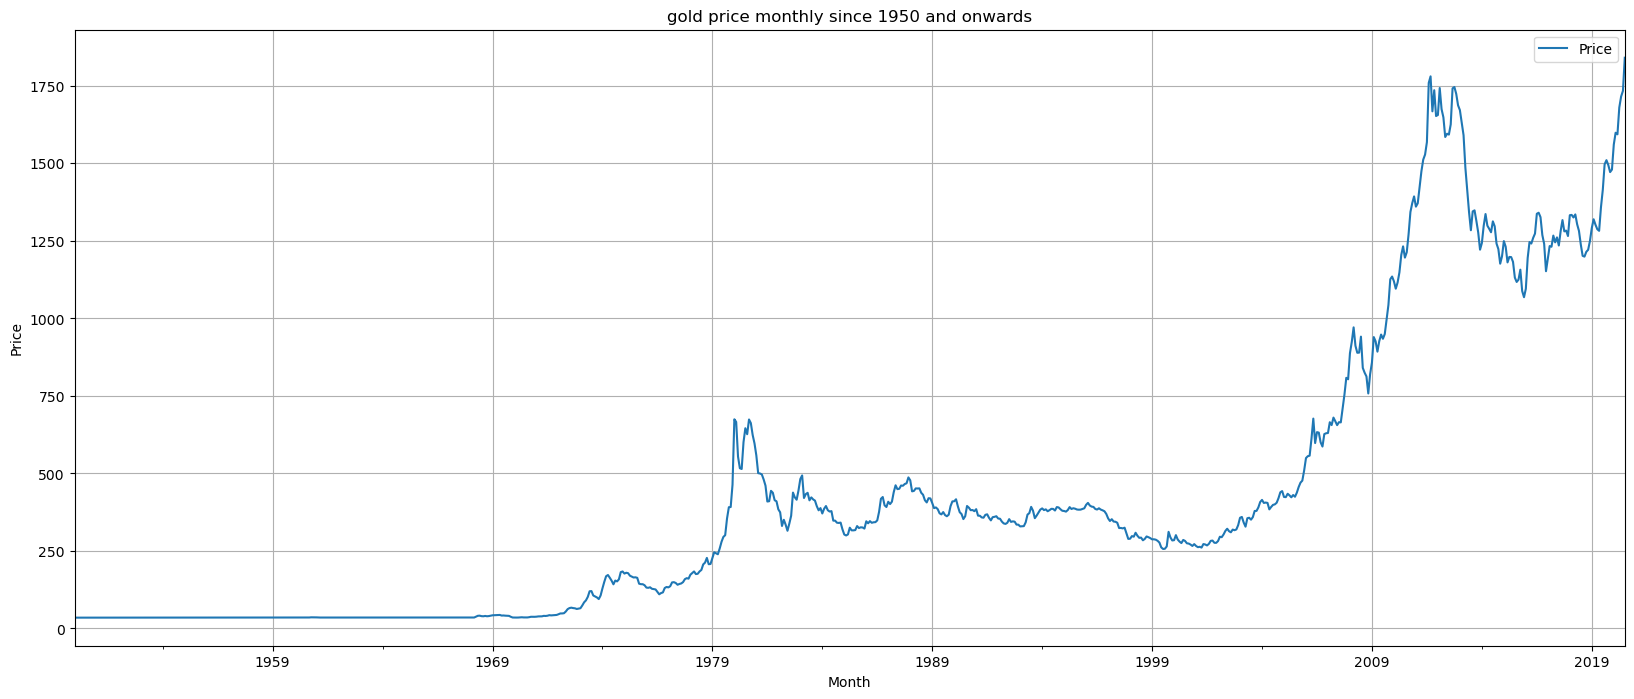

In [109]:
df.plot(figsize=(20,8))
plt.title('gold price monthly since 1950 and onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid();

In [110]:
round(df['Price'].describe())

count     847.0
mean      417.0
std       454.0
min        34.0
25%        35.0
50%       320.0
75%       447.0
max      1841.0
Name: Price, dtype: float64

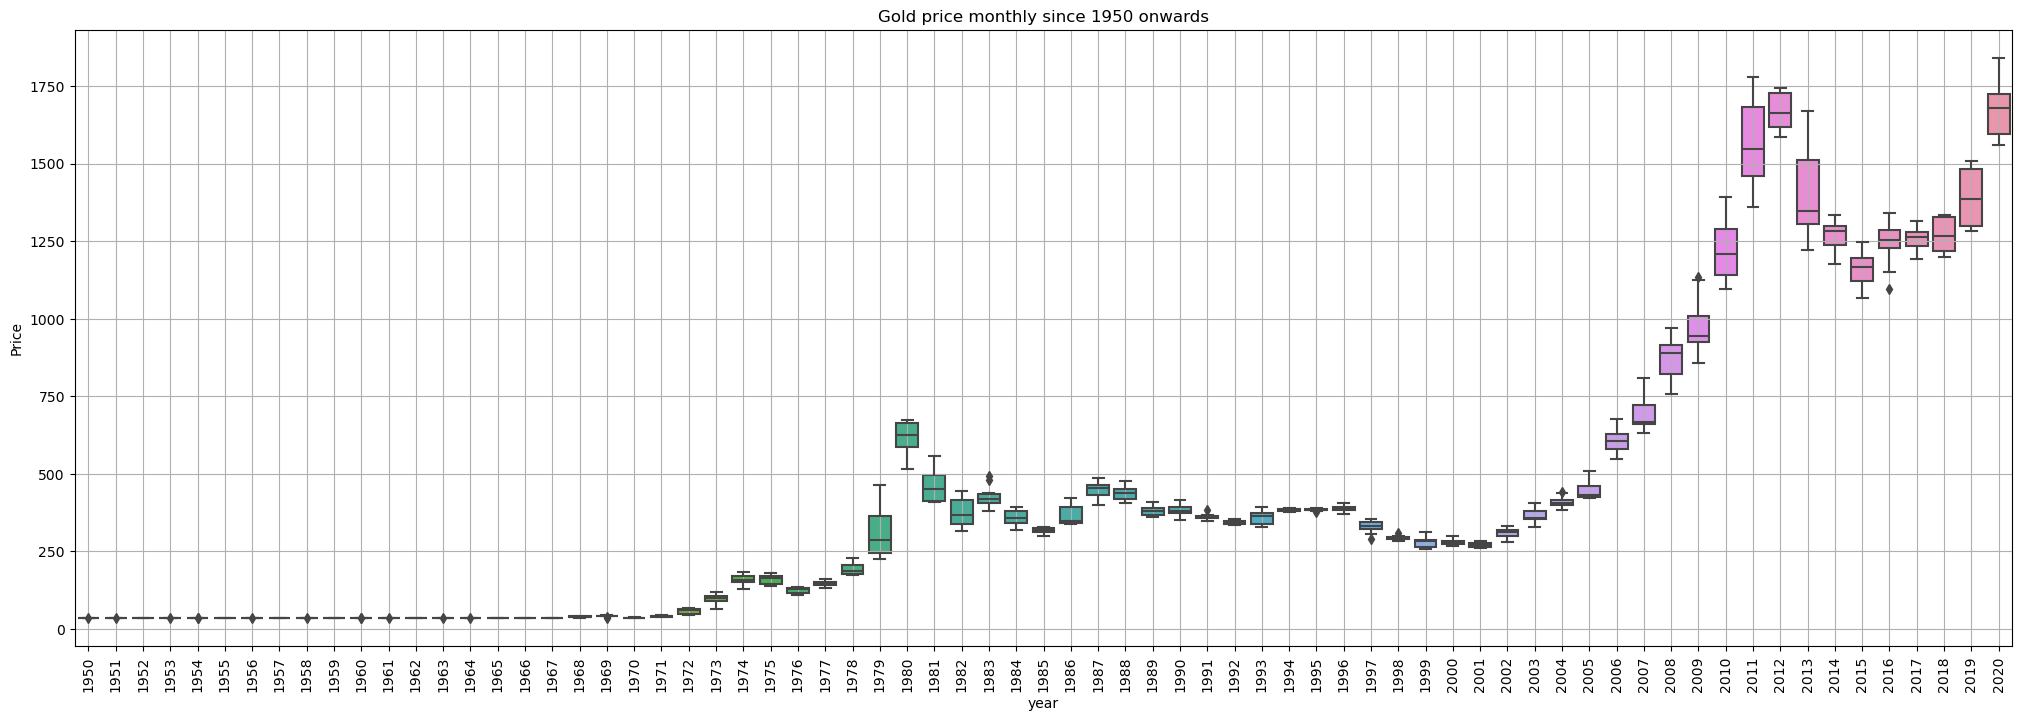

In [111]:
_,ax= plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0],ax=ax)
plt.title("Gold price monthly since 1950 onwards")
plt.xlabel('year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid();

Text(0, 0.5, 'Price')

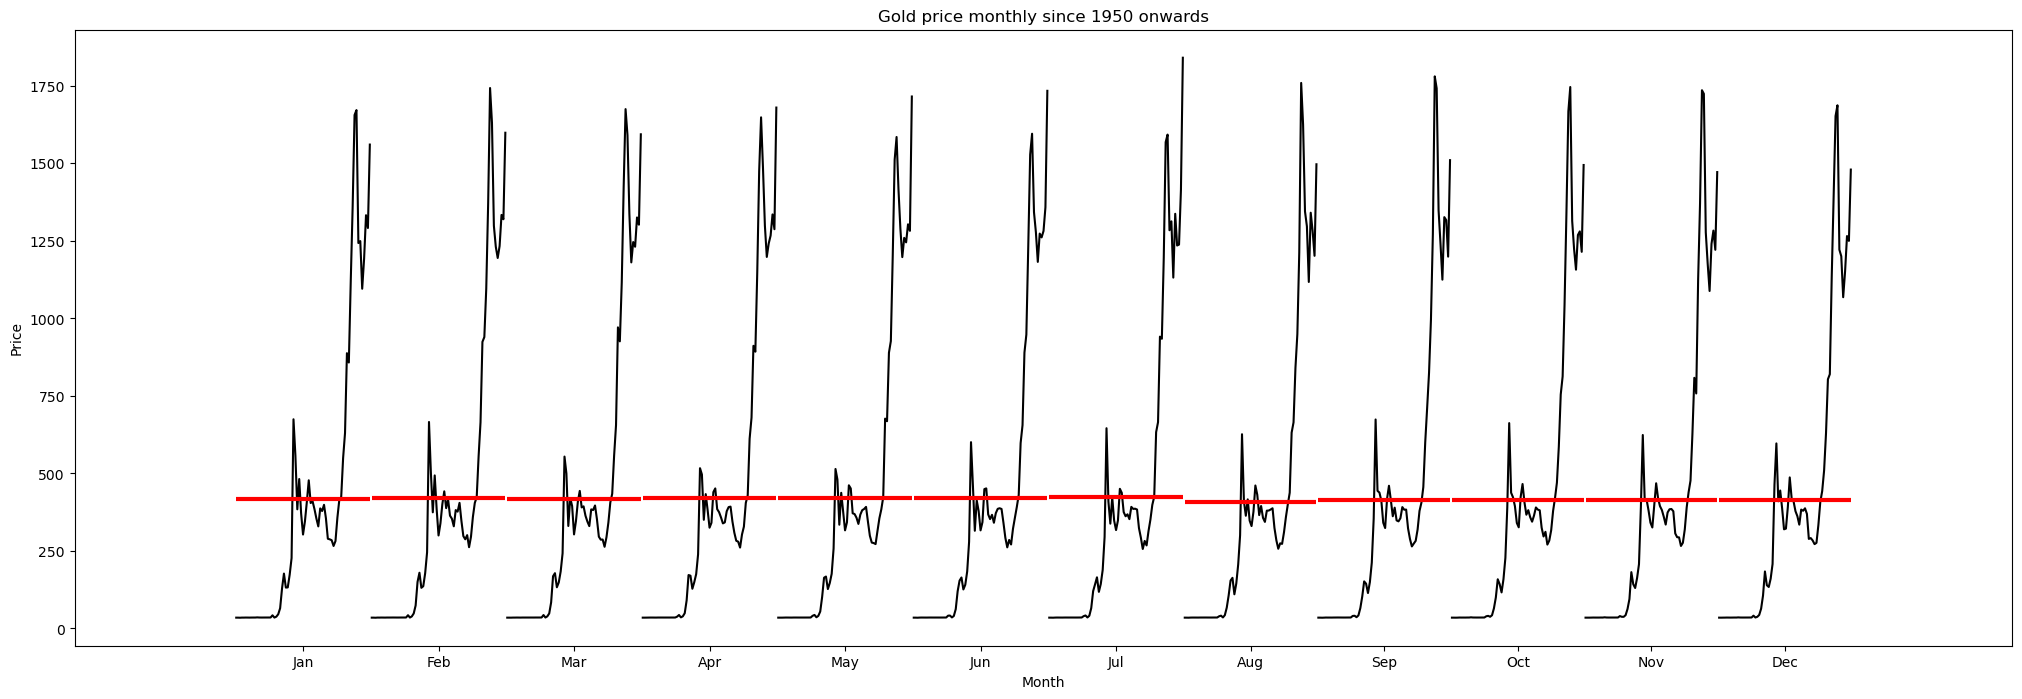

In [112]:
from statsmodels.graphics.tsaplots import month_plot
fig,ax=plt.subplots(figsize=(25,8))
month_plot(df,ylabel="Gold price",ax=ax)
plt.title("Gold price monthly since 1950 onwards")
plt.xlabel('Month')
plt.ylabel('Price')

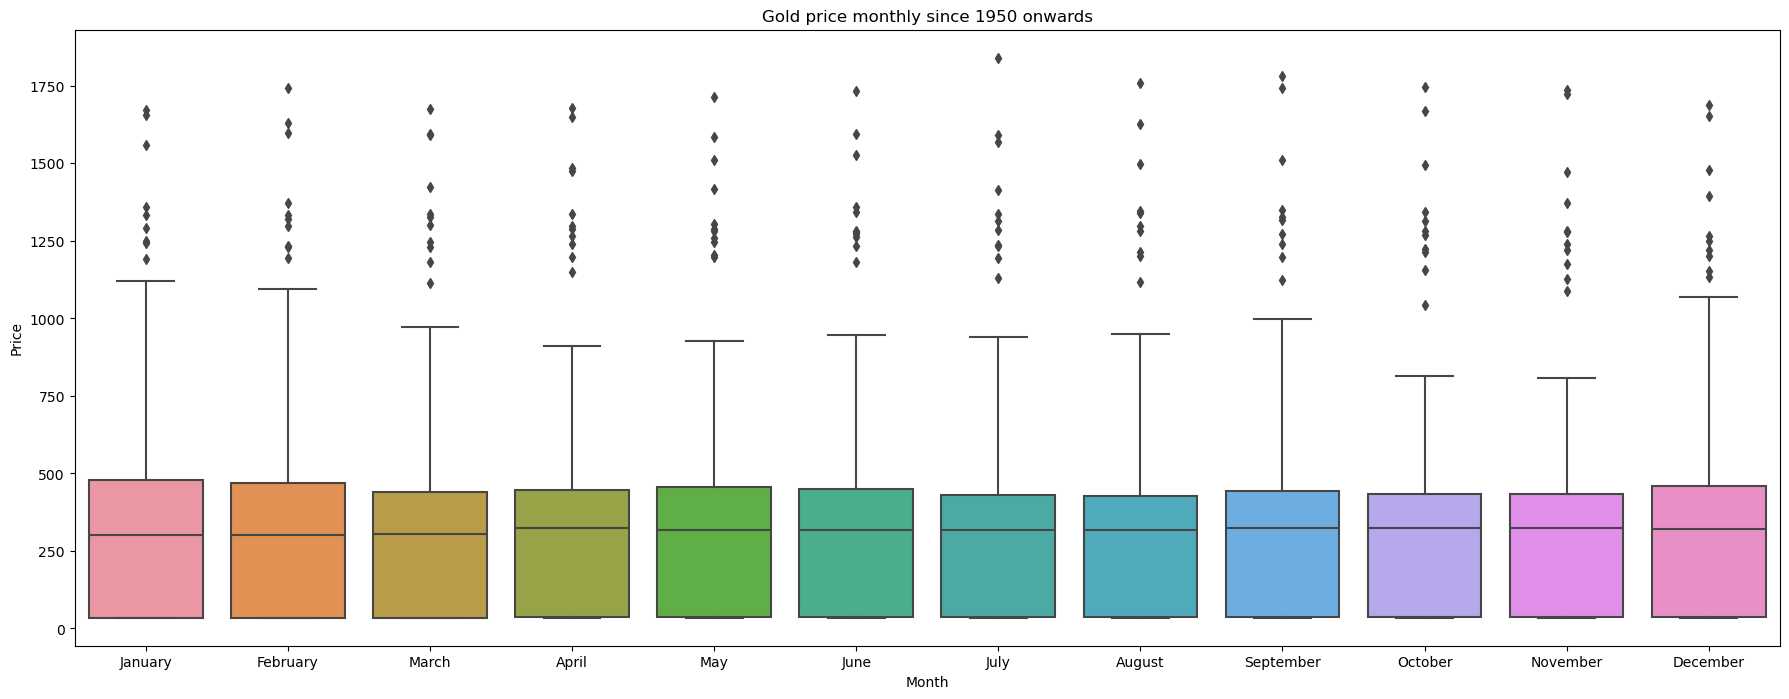

In [113]:
fig,ax=plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(), y=df.values[:,0],ax=ax)
plt.title("Gold price monthly since 1950 onwards")
plt.xlabel('Month')
plt.ylabel('Price')
plt.show();

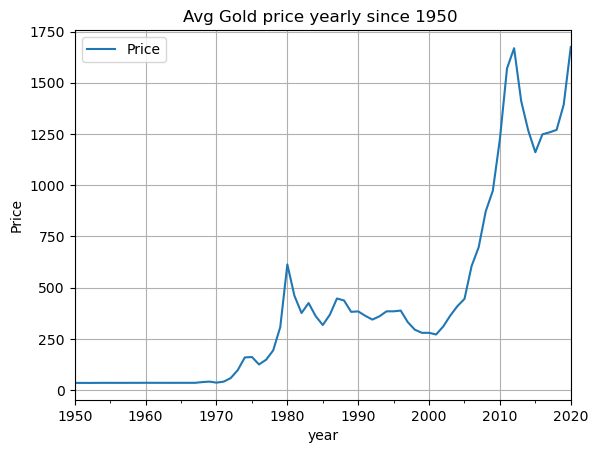

In [114]:
df_yearly_sum= df.resample('A').mean()
df_yearly_sum.plot();
plt.title("Avg Gold price yearly since 1950 ")
plt.xlabel('year')
plt.ylabel('Price')
plt.grid();

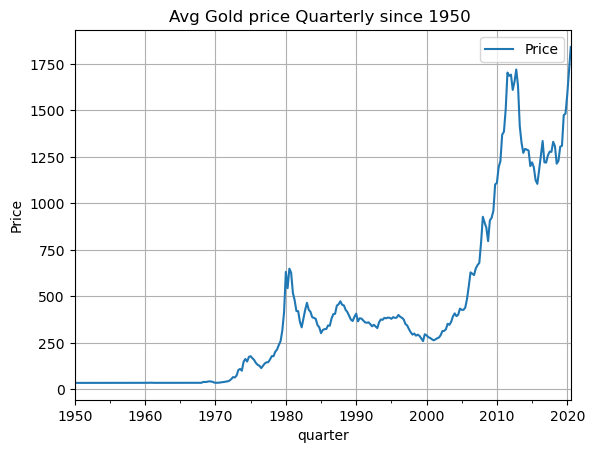

In [115]:
df_quarterly_sum= df.resample('Q').mean()
df_quarterly_sum.plot();
plt.title("Avg Gold price Quarterly since 1950 ")
plt.xlabel('quarter')
plt.ylabel('Price')
plt.grid();

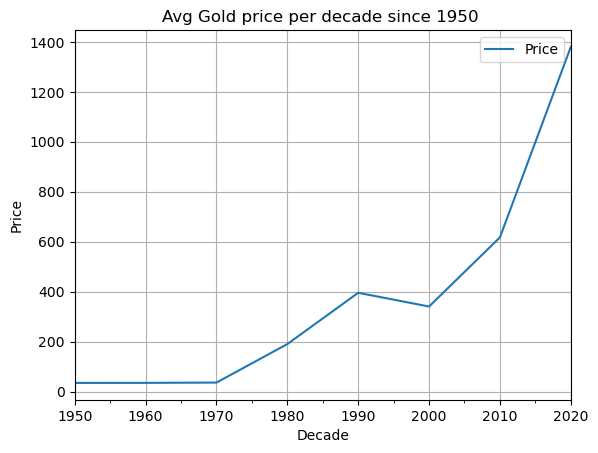

In [116]:
df_decade_sum= df.resample('10Y').mean()
df_decade_sum.plot();
plt.title("Avg Gold price per decade since 1950 ")
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid();

In [117]:
df_1= df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1= df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index=True)
df_1['cov_pct']=((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,cov_pct
Month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


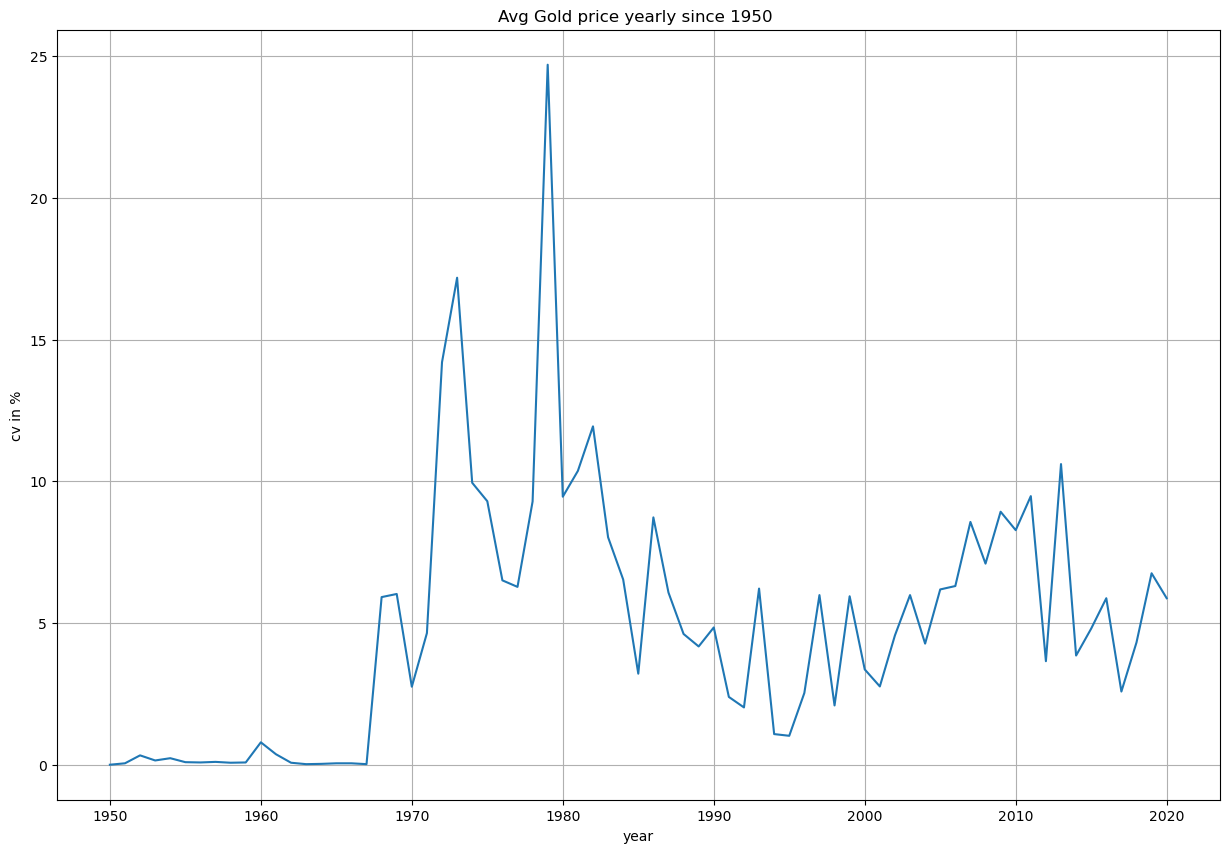

In [118]:
fig, ax= plt.subplots(figsize=(15,10))
df_1['cov_pct'].plot();
plt.title("Avg Gold price yearly since 1950 ")
plt.xlabel('year')
plt.ylabel('cv in %')
plt.grid();

In [119]:
train=df[df.index.year <=2015]
test=df[df.index.year >2015]

In [120]:
print(train.shape)

(792, 1)


In [121]:
print(test.shape)

(55, 1)


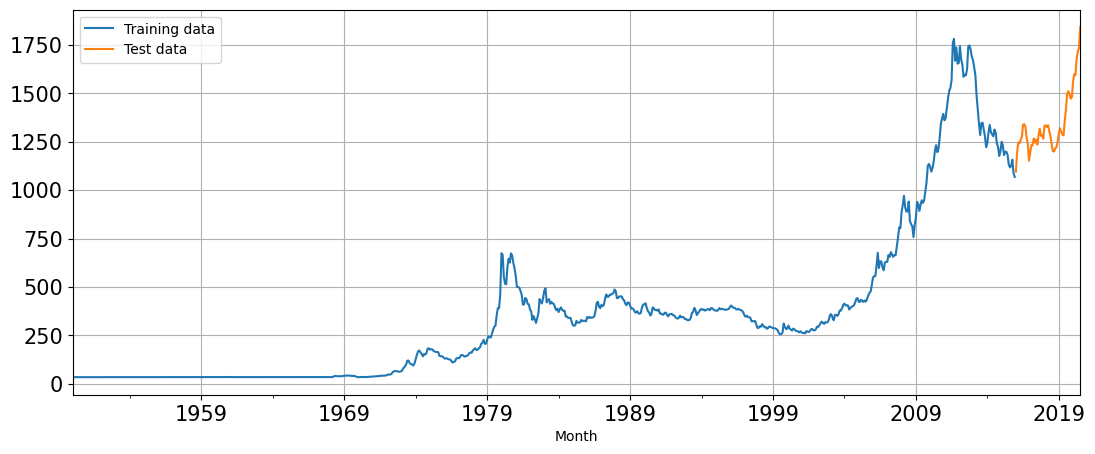

In [122]:
train['Price'].plot(figsize=(13,5),fontsize=15)
test['Price'].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend(['Training data','Test data'])
plt.show()

In [123]:
train_time=[i+1 for i in range(len(train))]
test_time= [i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)

(792, 55)

In [124]:
LR_train=train.copy()
LR_test= test.copy()

In [125]:
LR_train['time']=train_time
LR_test['time']=test_time

In [126]:
LR=LinearRegression()
LR.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

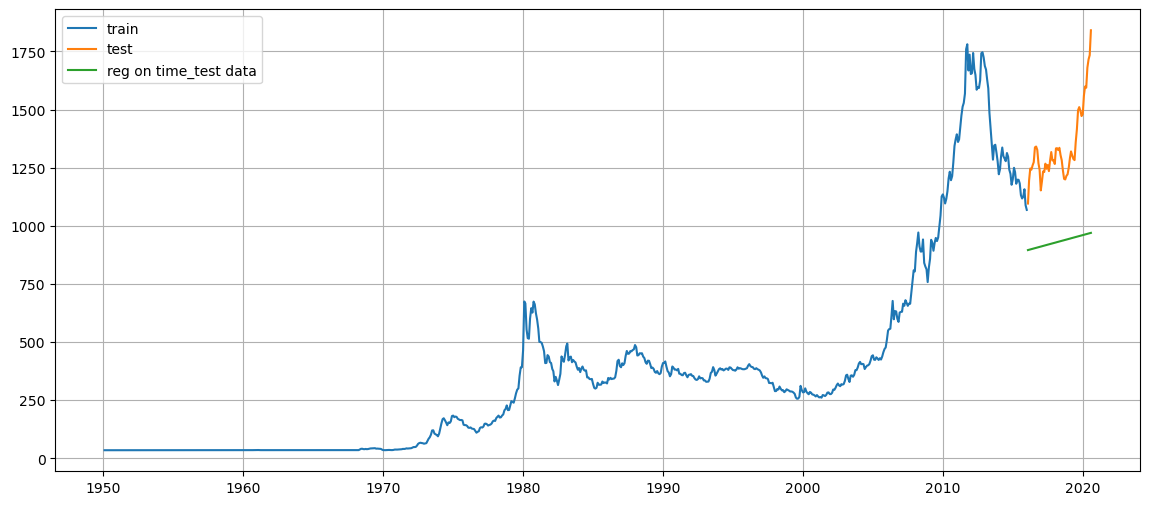

In [127]:
test_prediction_model1=LR.predict(LR_test[['time']])
LR_test['forecast']=test_prediction_model1

plt.figure(figsize=(14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(LR_test['forecast'],label='reg on time_test data')
plt.legend(loc='best')
plt.grid();

In [128]:
def mape(actual,pred):
    return round((np.mean(abs(actual-pred)/actual))*100,2)

In [130]:
mape_model_test= mape(test['Price'].values,test_prediction_model1)
print("MAPE is %3.3f"%(mape_model_test),"%")

MAPE is 29.760 %


In [134]:
result=pd.DataFrame({"Test Mape (%)":[mape_model_test]},index=["RegressionOnTime"])
result

,Test Mape (%)
RegressionOnTime,29.76


## Naive

In [136]:
Naive_train=train.copy()
Naive_test= test.copy()

In [137]:
Naive_test['naive']=np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

Month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

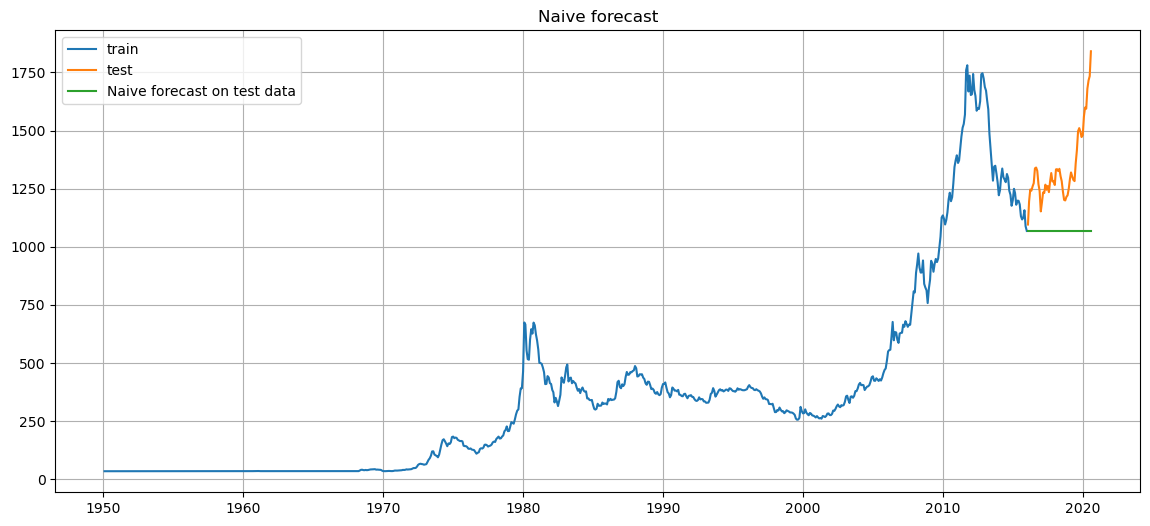

In [138]:
plt.figure(figsize=(14,6))
plt.plot(Naive_train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(Naive_test['naive'],label='Naive forecast on test data')
plt.legend(loc='best')
plt.title('Naive forecast')
plt.grid();

In [139]:
mape_model2_test= mape(test['Price'].values,Naive_test['naive'].values)
print("MAPE is %3.3f"%(mape_model2_test),"%")

MAPE is 19.380 %


In [144]:
result2=pd.DataFrame({"Test Mape2 (%)":[mape_model2_test]},index=["NaiveModel"])
Score_table=pd.concat([result,result2])
Score_table

,Test Mape (%),Test Mape2 (%)
RegressionOnTime,29.76,NaN
NaiveModel,NaN,19.38


In [151]:
final_model= ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.4,
                                                         smoothing_trend=0.3,
                                                         smoothing_seasonal=0.6)

In [153]:
mape_final_model= mape(df['Price'].values,final_model.fittedvalues)
print("Mape:",mape_final_model)

Mape: 17.24


In [158]:
predictions= final_model.forecast(steps=len(test))

In [162]:
pred_df= pd.DataFrame({'lower CI':predictions - 1.96*np.std(final_model.resid,ddof=1),
                       'prediction':predictions,
                       'upper CI':predictions + 1.96*np.std(final_model.resid,ddof=1)})

In [163]:
pred_df.head()

,lower CI,prediction,upper CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154


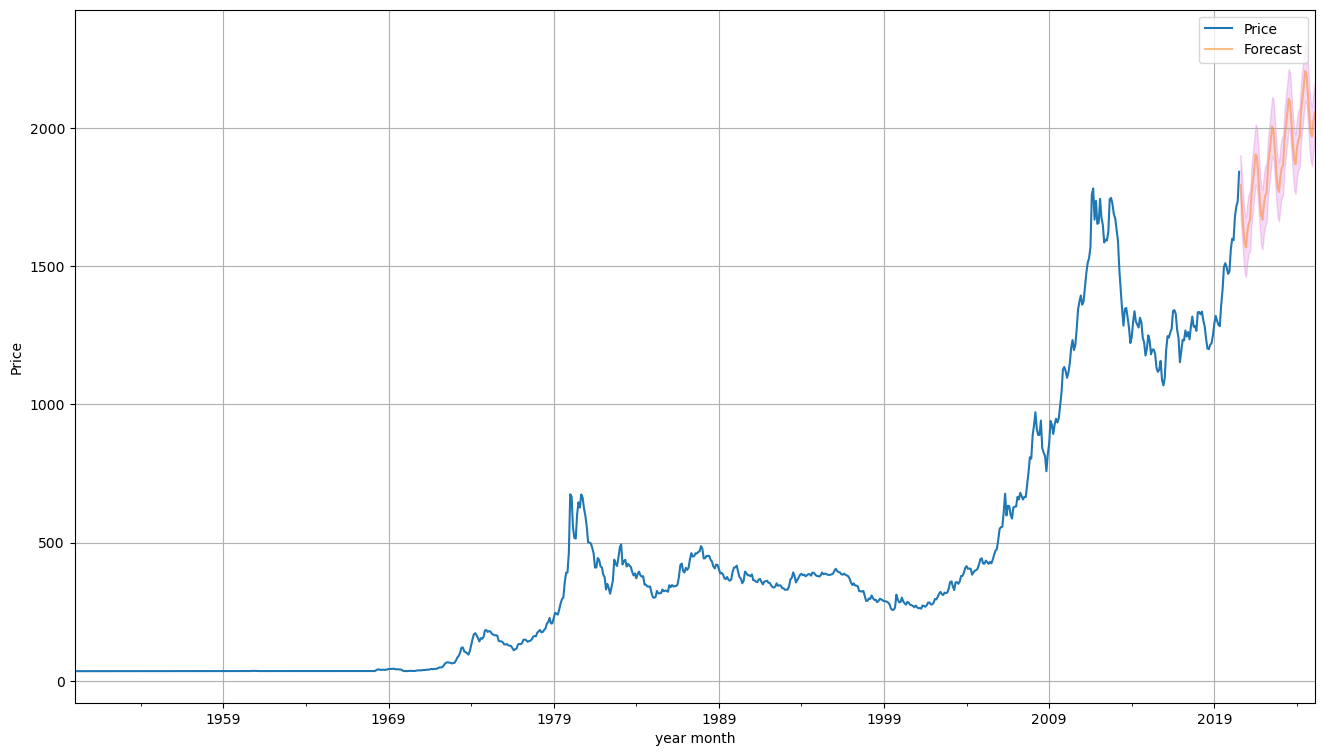

In [166]:
axis=df.plot(label='Acual',figsize=(16,9))
pred_df['prediction'].plot(ax=axis,label='Forecast',alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower CI'],pred_df['upper CI'],color='m',alpha=0.15)
axis.set_xlabel('year month')
axis.set_ylabel('Price')
plt.legend(loc='best')
plt.grid();
plt.show()